#DATA MINING PROJECT
#Neural Networck

##prepared by:
###Berreksi Khadidja
<br>
<br>
<br>
<br>

## Problem Statement
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease. People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

## Project Objectives
- Determine what makes a person at risk for heart disease
- Create a machine learning model to perform early detection of cardiovascular dieseases for patients

In [ ]:
import numpy as np  # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #data viz
import seaborn as sns #data viz
import plotly.express as px #data vis

In [ ]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## About Each Attribute
**Age:** age of the patient [years] <br>
**Sex:** sex of the patient [M: Male, F: Female] <br>
**ChestPainType:** chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] <br>
**RestingBP:** resting blood pressure [mm Hg]  <br>
**Cholesterol:** serum cholesterol [mm/dl] <br>
**FastingBS:** fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] <br>
**RestingECG:** resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] <br>
**MaxHR:** maximum heart rate achieved [Numeric value between 60 and 202] <br>
**ExerciseAngina:** exercise-induced angina [Y: Yes, N: No] <br>
**Oldpeak:** oldpeak = ST [Numeric value measured in depression] <br>
**ST_Slope:** the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] <br>
**HeartDisease:** output class [1: heart disease, 0: Normal] <br>

## Visualizing the Data

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## To note for late:
RestingBP and Cholesterol both have minimum values of 0.0, this is impossible for a living person. This is most likely a place holder for missing values and will be treated as such later.

**display percent of dataset with heart disease**

In [ ]:
#display percent of dataset with heart disease
perc_dis = df['HeartDisease'].sum() / len(df)
print('Percent of patients in dataset with heart disease:', round(perc_dis, 4))

Percent of patients in dataset with heart disease: 0.5534


The dataset is balanced with 55%-45% split

In [ ]:
#Creates lists of the columns based on the data type/how data should be visualized
#catagorical variables
cat_vars = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']
#numeric variables
num_vars = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
#label
label = 'HeartDisease'

#Creates functions for plotting variables 

#function for plotting catagoric variables as a bar chart
def display_barchart(data, var, label):
    #calculates the count of patients in each catagory vs heart disease
    grp = data.groupby([var, label])[var].count().unstack().reset_index()

    labels = list(grp.iloc[:, 0].values)
    no_dis = list(grp.iloc[:, 1].values) #no heart disease patients
    yes_dis = list(grp.iloc[:, 2].values) #heart disease patients

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, no_dis, width, label='Healthy')
    rects2 = ax.bar(x + width/2, yes_dis, width, label='Heart Disease')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Number of Patients')
    ax.set_xlabel(var)
    ax.set_title('Heart Disease by ' + var)
    ax.set_xticks(x) # values
    ax.set_xticklabels(labels) # labels
    ax.legend()

    fig.tight_layout()
    plt.show()
    
    

#function for plotting numeric variables as a kde chart
def display_kdechart(data, var, label):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(var, hue='HeartDisease', data=heart_data)
    plt.title('Heart Disease by ' + var + ' Distribution')
    plt.show()

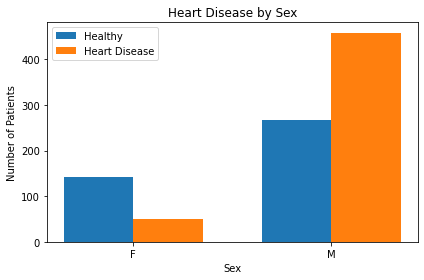

In [ ]:
display_barchart(df, "Sex", label)

**According to the plot, the result of cases sex:**<br>
- Male: 725 cases(~ 79%), 458 of them have heart disease(63%)
- Female: 193 cases(~ 21%), 50 of them have heart disease(26%)
However, the size of data is not big enough, but we can guess men are suffering heart disease more..<br>

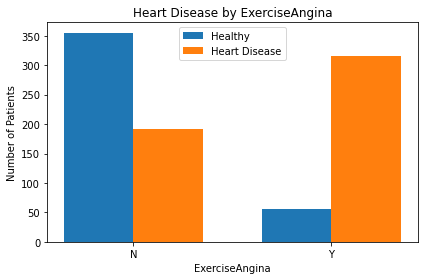

In [ ]:
display_barchart(df, 'ExerciseAngina', label)

**According to the plot, the result of exercise angina:**<br>
- No: 547 cases(~ 60%), 192 of them have heart disease(35%)
- Yes: 371 cases(~ 40%), 316 of them have heart disease(85%)
- patients with 'yes' have a far higher chance of heart disease.
We can understand exercise angina is one of important feature for diagnosis heart disease.<br>

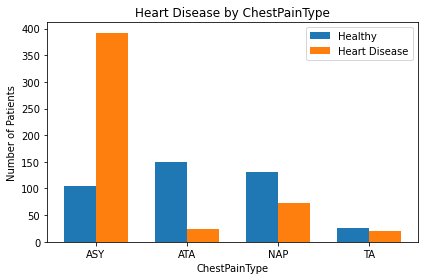

In [ ]:
display_barchart(df, 'ChestPainType', label)

**We know pain is the effect side of disease but we can discuss about it:**<br>
- ATA: 173 cases (~ 20%), 24 of them have heart disease (~ 14%)
- NAP: 203 cases (~ 22%), 72 of them have heart disease (35%)
- TA : 46 cases (~ 5%), 20 of them have heart disease (43%)
- ASY: 496 cases (~ 53%), 392 of them have heart disease (~ 80%)
patients with ASY chest pain have a far higher chance of having heart disease than other types of chest pain. This is followed by TA chest pain (50% chance), NAP (under 50%) and ATA (low risk).<br>

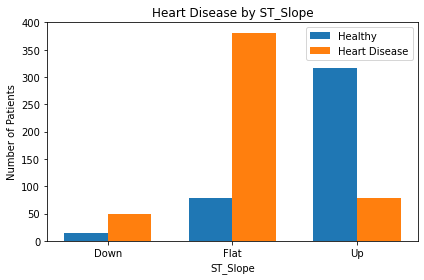

In [ ]:
display_barchart(df, 'ST_Slope', label)

**According to the plot,the result of ST slope:**
- up: 395 cases (43%), 78 of them have heart disease(~20%)
- flat: 460 cases (50%), 381 of them have heart disease(~82%)
- Up: 63 cases (7%), 49 of them have heart disease(~77%)
We can get cases with 'Flat' and 'Down' ST slop are in high risk of heart disease <br>

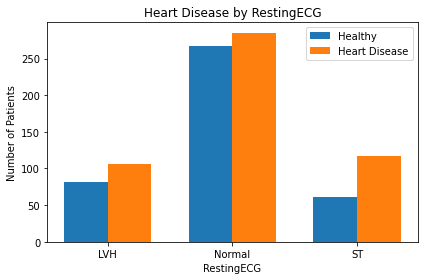

In [ ]:
display_barchart(df, 'RestingECG', label)

**According to the plot, the result of resting ECG:**<br>
- normal: 552 cases(60%), 285 of them have heart disease(~52%)
- ST: 178 cases(20%), 117 of them have heart disease(~66%)
- LVH: 188 cases(20%), 106 of them have heart disease(~56%)
- We can see about half of each type have heart disease
- ST patients have a slight higher chance than others.<br>


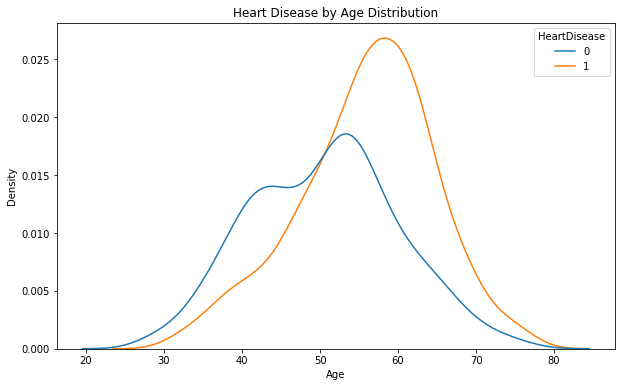

In [ ]:
display_kdechart(df, "Age", label)

**older patients have a higher risk of heart disease.**

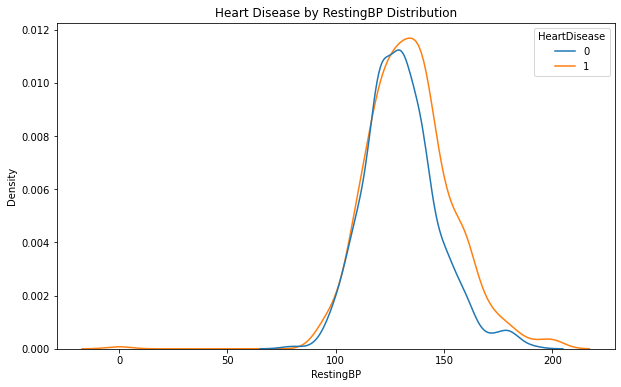

In [ ]:
display_kdechart(df, "RestingBP", label)

**patients with a higher resting blood preasure have a slightly higher risk of heart disease**

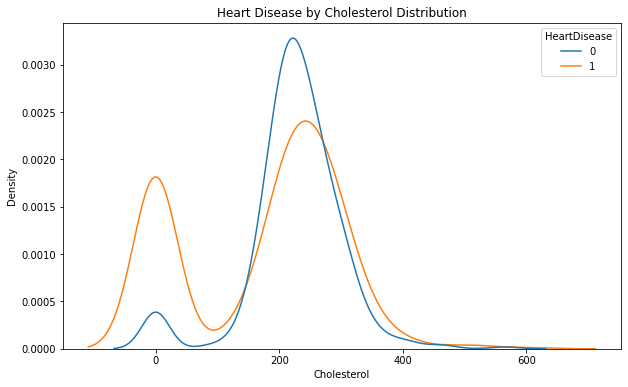

In [ ]:
display_kdechart(df, "Cholesterol", label)

**based on the data it is difficult to determine if cholesteralis an indicator for heart disease. It is worth noting that for the 0 values (filler values), a vast majority of patients had heart disease.**

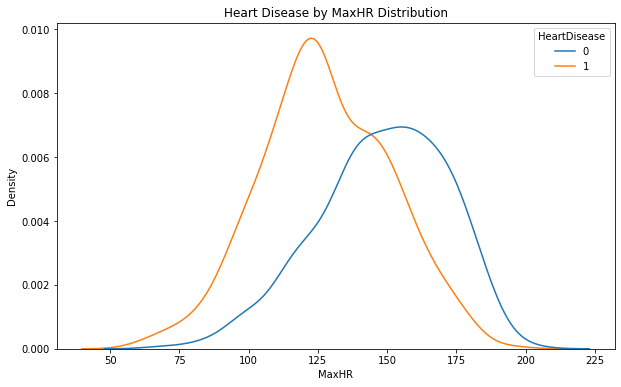

In [ ]:
display_kdechart(df, "MaxHR", label)

**patients with a lower maximum heart rate have a higher chance of heart disease.**

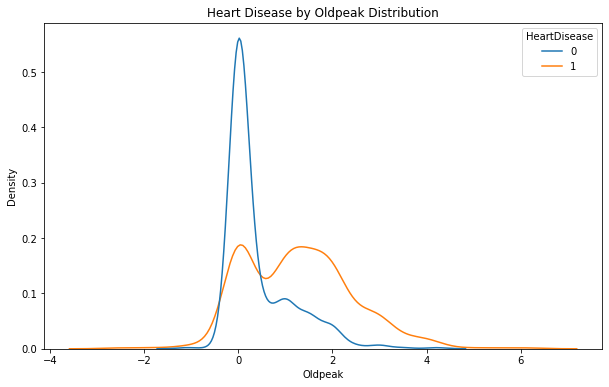

In [ ]:
display_kdechart(df, 'Oldpeak', label)

**patients with higher values are at risk for heart disease.**

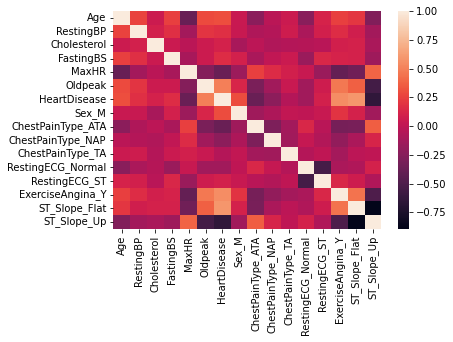

In [ ]:
import seaborn as sns 
ax = sns.heatmap(df_filtred.corr()) 

**We can see that the feature that most affect Heart Disease are Age and Fasting Blood Sugar. While Mac Heart Rate affects the least.**

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

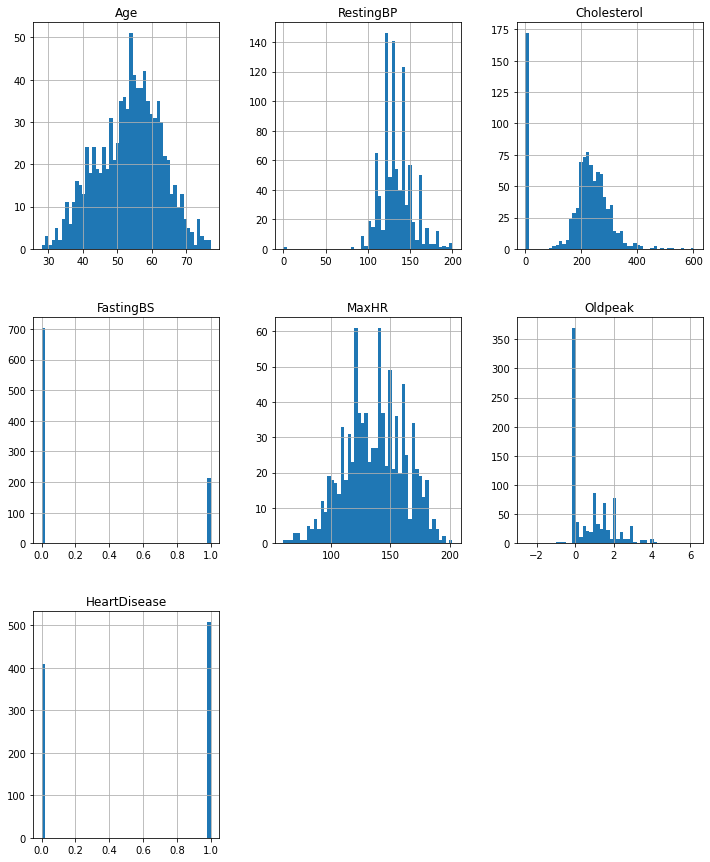

In [ ]:
df.hist(bins=50,figsize=(12,15))

**we notice that Cholesterol, RestingBP and Oldpeack contine outliers we may need to deal with**  

## Data Preprocessing
Now that we better understand the data, the data can be processed to feed to the neural network. This will involve taking care of the 0 values for Cholesterol and RestingBP. Because Cholesterol was not a significant indicator of whether a patient has heart disease, it will be dropped. The 0 value for RestingBP will be filled with the average. After this, the catagoric variables need to be encoded and numeric variables scaled. Finally, the data set will be split into train, validation and test datasets.

#### converting categorical data into dummy or indicator variables

In [ ]:
df_dummies = pd.get_dummies(df, drop_first=True) #convert categorecal data into indicator variables
df_dummies

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


In [ ]:
df_filtred=df_dummies[(df_dummies["Cholesterol"]!=0)]
info=df_filtred[["RestingBP","Cholesterol","Oldpeak","MaxHR"]].describe()
info

,RestingBP,Cholesterol,Oldpeak,MaxHR
count,746.000000,746.000000,746.000000,746.000000
mean,133.022788,244.635389,0.901609,140.226542
std,17.282750,59.153524,1.072861,24.524107
min,92.000000,85.000000,-0.100000,69.000000
25%,120.000000,207.250000,0.000000,122.000000
50%,130.000000,237.000000,0.500000,140.000000
75%,140.000000,275.000000,1.500000,160.000000
max,200.000000,603.000000,6.200000,202.000000


#### Cleaning the data

**for cleaning our data we have tried deffrent methodes :**<br>
**First modele:** we have deroped Cholesterol variable form our predictive variables because 35% of it values are null<br>
**Second modele :** replacing null values by mean<br>
**Third modele :** replacing null values by mediane<br>
**fourth modele:** replacing outliers for RestingBP, Cholesterol and Oldpeak by 25% 75% quantiles<br>

In [ ]:
# drop cholesterole variable and replacing RestingBp 0 values by mean 
df_cleaned_1=df_dummies.drop('Cholesterol',1)

df_cleaned_1.loc[df_cleaned_1['RestingBP']==0,'RestingBP'] = info.loc['mean','RestingBP']

# replacing all 0 values by mean for restingBP and Cholesterol
df_cleaned_2=df_dummies
df_cleaned_2.loc[df_cleaned_2['Cholesterol']==0,'Cholesterol'] = info.loc['mean','Cholesterol']
df_cleaned_2.loc[df_cleaned_2['RestingBP']==0,'RestingBP'] = info.loc['mean','RestingBP']

# replacing all 0 values by mediane for restingBP and Cholesterol
df_cleaned_3=df_dummies
df_cleaned_3.loc[df_cleaned_3['Cholesterol']==0,'Cholesterol'] = info.loc['50%','Cholesterol']
df_cleaned_3.loc[df_cleaned_3['RestingBP']==0,'RestingBP'] = info.loc['50%','RestingBP']


# replacing outliers
df_cleaned_4=df_dummies
mask=df_cleaned_4['Cholesterol']<90
df_cleaned_4.loc[mask,'Cholesterol'] = info.loc['25%','Cholesterol']
mask=df_cleaned_4['Cholesterol']>420
df_cleaned_4.loc[mask,'Cholesterol'] = info.loc['75%','Cholesterol']

mask=df_cleaned_4['RestingBP']<90
df_cleaned_4.loc[mask,'RestingBP'] = info.loc['25%','RestingBP']
mask=df_cleaned_4['RestingBP']>190
df_cleaned_4.loc[mask,'RestingBP'] = info.loc['75%','RestingBP']

mask=df_cleaned_4['Oldpeak']<0
df_cleaned_4.loc[mask,'Oldpeak'] = info.loc['25%','Oldpeak']
mask=df_cleaned_4['Oldpeak']>6
df_cleaned_4.loc[mask,'Oldpeak'] = info.loc['75%','Oldpeak']

C:\Users\brahi\AppData\Local\Temp/ipykernel_9448/1498296198.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



#### Scaling the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
df_scaled_1 =scaler.fit_transform(df_cleaned_1)
df_scaled_1= pd.DataFrame(df_scaled_1,columns=df_cleaned_1.columns)

df_scaled_2 =scaler.fit_transform(df_cleaned_2)
df_scaled_2= pd.DataFrame(df_scaled_2,columns=df_cleaned_2.columns)

df_scaled_3 =scaler.fit_transform(df_cleaned_3)
df_scaled_3= pd.DataFrame(df_scaled_3,columns=df_cleaned_3.columns)

df_scaled_4 =scaler.fit_transform(df_cleaned_4)
df_scaled_4= pd.DataFrame(df_scaled_4,columns=df_cleaned_4.columns)



## Modele One

In [ ]:
# train test data

from sklearn.model_selection import train_test_split

x = df_scaled_1.drop(["HeartDisease"],axis=1)
y = df_scaled_1['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


**Training the networck**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



#define the layers
neural_network_14 = Sequential()
neural_network_14.add(Dense(1, input_dim=14, activation='sigmoid',use_bias=True))


#compile the models
opt = keras.optimizers.Adam(learning_rate=0.001)
neural_network_14.compile(loss='binary_crossentropy',optimizer=opt,metrics=["BinaryAccuracy"])

#fitting the model 
neural_network_14.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.6690 - binary_accuracy: 0.5467
Epoch 2/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.6558 - binary_accuracy: 0.5514
Epoch 3/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.6443 - binary_accuracy: 0.6012
Epoch 4/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.6328 - binary_accuracy: 0.6246
Epoch 5/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.6220 - binary_accuracy: 0.6745
Epoch 6/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.6117 - binary_accuracy: 0.6885
Epoch 7/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.6020 - binary_accuracy: 0.7118
Epoch 8/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.5928 - binary_accuracy: 0.7274
Epoch 9/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.5843 - binary_accuracy: 0.7383
Epoch 10/1000
21/21 [================

**calculate accuracy for the train dataset**

In [ ]:
#train accuracy
_, accuracy=neural_network_14.evaluate(X_train,y_train)
print("train accuracy : %.2f" % (accuracy*100))

21/21 [==============================] - 0s 2ms/step - loss: 0.3468 - binary_accuracy: 0.8536
train accuracy : 85.36


**evaluate accuracy on the test set.**

In [ ]:
from sklearn.metrics import accuracy_score

y_pred=neural_network_14.predict(X_test)
y_pred=[1 if y>=0.5 else 0 for y in y_pred]
accuracy = accuracy_score(y_test,y_pred)*100
print("précision de la prédection : %.2f %%" % accuracy)

précision de la prédection : 88.41 %


**Confusion Matrix**

<AxesSubplot:>

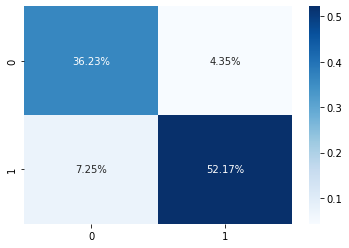

In [ ]:
cf_matrix=tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

## Modele Two

In [ ]:
# train test data

x = df_scaled_2.drop(["HeartDisease"],axis=1)
y = df_scaled_2['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

#define the layers
neural_network_15 = Sequential()
neural_network_15.add(Dense(1, input_dim=15, activation='sigmoid',use_bias=True))


#compile the models
opt = keras.optimizers.Adam(learning_rate=0.001)
neural_network_15.compile(loss='binary_crossentropy',optimizer=opt,metrics=["BinaryAccuracy"])
#fitting the model 
neural_network_15.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
21/21 [==============================] - 1s 2ms/step - loss: 0.7308 - binary_accuracy: 0.5592
Epoch 2/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.7072 - binary_accuracy: 0.5607
Epoch 3/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.6872 - binary_accuracy: 0.5623
Epoch 4/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.6688 - binary_accuracy: 0.5732
Epoch 5/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.6515 - binary_accuracy: 0.5857
Epoch 6/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.6354 - binary_accuracy: 0.6028
Epoch 7/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.6215 - binary_accuracy: 0.6199
Epoch 8/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.6080 - binary_accuracy: 0.6511
Epoch 9/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.5958 - binary_accuracy: 0.6682
Epoch 10/1000
21/21 [================

**calculate accuracy for the train dataset**

In [ ]:
#train accuracy
_, accuracy=neural_network_15.evaluate(X_train,y_train)
print("train accuracy : %.2f" % (accuracy*100))

21/21 [==============================] - 0s 2ms/step - loss: 0.3443 - binary_accuracy: 0.8536
train accuracy : 85.36


**evaluate accuracy on the test set.**

In [ ]:
y_pred=neural_network_15.predict(X_test)
y_pred=[1 if y>=0.5 else 0 for y in y_pred]
accuracy = accuracy_score(y_test,y_pred)*100
print("précision de la prédection : %.2f %%" % accuracy)

précision de la prédection : 86.59 %


**Confusion Matrix**

<AxesSubplot:>

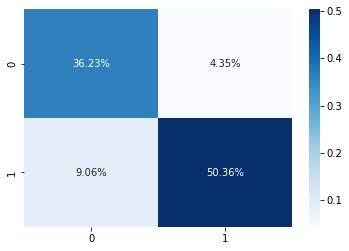

In [ ]:
cf_matrix=tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

## Third modele : 

In [ ]:
# train test data

x = df_scaled_3.drop(["HeartDisease"],axis=1)
y = df_scaled_3['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

#fitting the model 
neural_network_15.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.3446 - binary_accuracy: 0.8536
Epoch 2/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.3444 - binary_accuracy: 0.8536
Epoch 3/1000
21/21 [==============================] - 0s 975us/step - loss: 0.3444 - binary_accuracy: 0.8536
Epoch 4/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.3446 - binary_accuracy: 0.8536
Epoch 5/1000
21/21 [==============================] - 0s 982us/step - loss: 0.3444 - binary_accuracy: 0.8536
Epoch 6/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.3445 - binary_accuracy: 0.8520
Epoch 7/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.3445 - binary_accuracy: 0.8536
Epoch 8/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.3444 - binary_accuracy: 0.8536
Epoch 9/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.3444 - binary_accuracy: 0.8536
Epoch 10/1000
21/21 [============

**calculate accuracy for the train dataset**

In [ ]:
#train accuracy
_, accuracy=neural_network_15.evaluate(X_train,y_train)
print("train accuracy : %.2f" % (accuracy*100))

21/21 [==============================] - 0s 917us/step - loss: 0.3439 - binary_accuracy: 0.8551
train accuracy : 85.51


**evaluate accuracy on the test set.**

In [ ]:
y_pred=neural_network_15.predict(X_test)
y_pred=[1 if y>=0.5 else 0 for y in y_pred]
accuracy = accuracy_score(y_test,y_pred)*100
print("précision de la prédection : %.2f %%" % accuracy)

précision de la prédection : 86.59 %


**Confusion Matrix**

<AxesSubplot:>

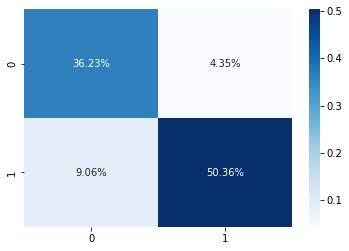

In [ ]:
cf_matrix=tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

## Fourth modele : 

In [ ]:
# train test data

x = df_scaled_4.drop(["HeartDisease"],axis=1)
y = df_scaled_4['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

#fitting the model 
neural_network_15.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.3440 - binary_accuracy: 0.8551
Epoch 2/1000
21/21 [==============================] - 0s 786us/step - loss: 0.3441 - binary_accuracy: 0.8551
Epoch 3/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.3440 - binary_accuracy: 0.8551
Epoch 4/1000
21/21 [==============================] - 0s 764us/step - loss: 0.3440 - binary_accuracy: 0.8551
Epoch 5/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.3440 - binary_accuracy: 0.8551
Epoch 6/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.3440 - binary_accuracy: 0.8551
Epoch 7/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.3440 - binary_accuracy: 0.8551
Epoch 8/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.3440 - binary_accuracy: 0.8551
Epoch 9/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.3440 - binary_accuracy: 0.8551
Epoch 10/1000
21/21 [============

**calculate accuracy for the train dataset**

In [ ]:
#train accuracy
_, accuracy=neural_network_15.evaluate(X_train,y_train)
print("train accuracy : %.2f" % (accuracy*100))

21/21 [==============================] - 0s 975us/step - loss: 0.3437 - binary_accuracy: 0.8567
train accuracy : 85.67


**evaluate accuracy on the test set.**

In [ ]:
y_pred=neural_network_15.predict(X_test)
y_pred=[1 if y>=0.5 else 0 for y in y_pred]
accuracy = accuracy_score(y_test,y_pred)*100
print("précision de la prédection : %.2f %%" % accuracy)

précision de la prédection : 86.59 %


**Confusion Matrix**

<AxesSubplot:>

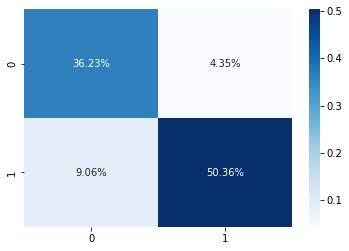

In [ ]:
cf_matrix=tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

Conclusion:
the best modele is Modele one where we remove Cholesterol from our predective variables which means that cholesterol is not a good indecator for heart disease     